# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sys
import missingno   # module to visualize missing values 

# Reading Data

In [3]:
sim_df = pd.read_csv(os.getcwd()+'\\Desktop\\Python\\Small Project\\Sim\\Sim_Data_Resolved_Jan21_to_Aug21.csv')

# Data explore

In [5]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Above mentioned command is to print all the inputs together in a single shell.

In [7]:
sim_df.head(3)

,IssueId,ShortId,IssueUrl,Title,Description,Status,NextStepAction,NextStepOwner,AssignedFolderId,AssignedFolderLabel,...,LegacyTicketCategory,LegacyTicketType,LegacyTicketItem,LegacyTicketDedupeString,EditCount,BlockedReason,Complexity (string),Requester Site (string),REQUEST TYPE (string),PURPOSE OF DATA REQUEST (string)
0,0694f0d8-88ef-4b7b-b0d3-81a07bfc1bbd,CSIA-OPS-582,https://issues.amazon.com/issues/CSIA-OPS-582,PNQ10 UK- Quality SIC Dashbaord Creation,Hi Team\n\nRequest your support in creating a ...,Resolved,Comment,resolver,127c4d36-dd22-4016-8e18-e7747121faf6,Misc,...,NaN,NaN,NaN,NaN,11,NaN,Easy,PNQ10,NaN,NaN
1,082f0b9c-3a14-43e6-8b31-4462032329f9,CSDA-IND-4300,https://issues.amazon.com/issues/CSDA-IND-4300,Scorecard Correction- Feb 2021- VCS CCU,** !!! THIS SIM FOLDER IS DEDICATED TO SUPPOR...,Resolved,Comment,resolver,de64ad06-471a-4282-ae58-9a56f7fe8e6d,Misc,...,NaN,NaN,NaN,NaN,13,NaN,0,VCSIND,NaN,NaN
2,00a8092d-8d8c-43a4-bc88-cabc389243f9,CSDA-IND-4754,https://issues.amazon.com/issues/CSDA-IND-4754,Refurbished Category Data,Require data for 'Refurbished and Open Box' un...,Resolved,Comment,resolver,7796206b-b8e3-49ee-940e-688c9a338fd9,CS INDIA ANALYTICS,...,NaN,NaN,NaN,NaN,24,NaN,Medium,PNQ10,NaN,NaN


In [8]:
sim_df.shape     # to check number of rows and columns

(2222, 59)

In [9]:
sim_df.info()

#Print a concise summary of a DataFrame.
#This method prints information about a DataFrame including the index dtype and column dtypes, 
#non-null values and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 59 columns):
IssueId                             2222 non-null object
ShortId                             2222 non-null object
IssueUrl                            2222 non-null object
Title                               2222 non-null object
Description                         2222 non-null object
Status                              2222 non-null object
NextStepAction                      2222 non-null object
NextStepOwner                       2222 non-null object
AssignedFolderId                    2222 non-null object
AssignedFolderLabel                 2222 non-null object
LabelIds                            1632 non-null object
Labels                              1632 non-null object
RequesterIdentity                   2222 non-null object
SubmitterIdentity                   2222 non-null object
ResolvedByIdentity                  2222 non-null object
CreateDate                          22

In [10]:
sim_df.isnull().sum()         #to check total number of missing values in columns

IssueId                                0
ShortId                                0
IssueUrl                               0
Title                                  0
Description                            0
Status                                 0
NextStepAction                         0
NextStepOwner                          0
AssignedFolderId                       0
AssignedFolderLabel                    0
LabelIds                             590
Labels                               590
RequesterIdentity                      0
SubmitterIdentity                      0
ResolvedByIdentity                     0
CreateDate                             0
LastUpdatedDate                        0
LastUpdatedConversationDate            0
ResolvedDate                           0
AssigneeIdentity                     110
Tags                                2204
RootCauses                          2222
WatcherCount                           0
AffectedUserCount                      0
ConversationCoun

# Data Cleaning

# Dropping columns which are populated <= 60% of dataset length

In [11]:
thresh=len(sim_df)*0.6
sim_df.dropna(how='any',thresh=thresh,axis=1,inplace=True)

In [12]:
sim_df.shape  #checking no. of columns remains

(2222, 35)

In [13]:
sim_df.isnull().sum()

IssueId                          0
ShortId                          0
IssueUrl                         0
Title                            0
Description                      0
Status                           0
NextStepAction                   0
NextStepOwner                    0
AssignedFolderId                 0
AssignedFolderLabel              0
LabelIds                       590
Labels                         590
RequesterIdentity                0
SubmitterIdentity                0
ResolvedByIdentity               0
CreateDate                       0
LastUpdatedDate                  0
LastUpdatedConversationDate      0
ResolvedDate                     0
AssigneeIdentity               110
WatcherCount                     0
AffectedUserCount                0
ConversationCount                0
SubTaskCount                     0
ParentTaskCount                  0
LocalEffortEstimate              0
TotalEffortEstimate              0
LocalEffortRemaining             0
TotalEffortRemaining

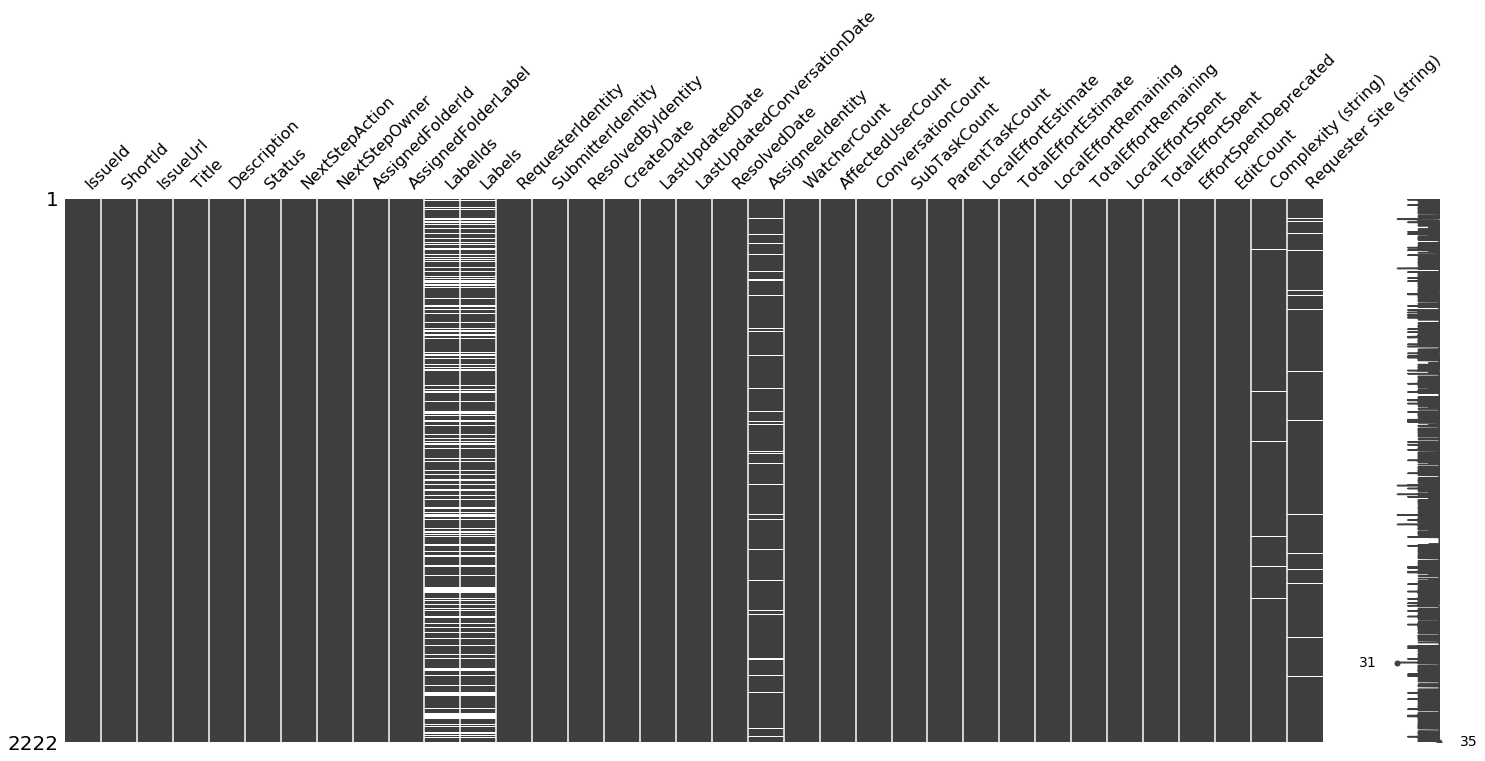

In [14]:
missingno.matrix(sim_df)   #visualizing missing values.

In [ ]:
#now we have nulls in 5 columns(Labellids,Lables,Assineeidentity,Complexity,Requester Site) only, will check it later.

In [15]:
#Resetting max column view, to see all the columns of the dataset coz by default at max 20 columns showed up.

pd.set_option('display.max_columns',40)

In [16]:
sim_df.head(1)

,IssueId,ShortId,IssueUrl,Title,Description,Status,NextStepAction,NextStepOwner,AssignedFolderId,AssignedFolderLabel,LabelIds,Labels,RequesterIdentity,SubmitterIdentity,ResolvedByIdentity,CreateDate,LastUpdatedDate,LastUpdatedConversationDate,ResolvedDate,AssigneeIdentity,WatcherCount,AffectedUserCount,ConversationCount,SubTaskCount,ParentTaskCount,LocalEffortEstimate,TotalEffortEstimate,LocalEffortRemaining,TotalEffortRemaining,LocalEffortSpent,TotalEffortSpent,EffortSpentDeprecated,EditCount,Complexity (string),Requester Site (string)
0,0694f0d8-88ef-4b7b-b0d3-81a07bfc1bbd,CSIA-OPS-582,https://issues.amazon.com/issues/CSIA-OPS-582,PNQ10 UK- Quality SIC Dashbaord Creation,Hi Team\n\nRequest your support in creating a ...,Resolved,Comment,resolver,127c4d36-dd22-4016-8e18-e7747121faf6,Misc,d03d28c1-c2f8-4557-82cd-93ccccb8ffc0,DE Sprint,sutapan,sutapan,blessyc,2021-07-20T11:16:23.264Z,2021-07-27T18:56:12.251Z,2021-07-27T18:56:12.251Z,2021-07-27T18:56:12.251Z,blessyc,2,0,4,0,0,0,0,0,0,0,0,0,11,Easy,PNQ10


# Dropping unncessary columns

In [17]:
#Dropping unncessary columns

sim_df.drop(columns=['TotalEffortEstimate','LocalEffortEstimate','TotalEffortRemaining','LocalEffortSpent',
                       'LocalEffortRemaining','TotalEffortSpent','EffortSpentDeprecated','LabelIds','AffectedUserCount',
                     'NextStepOwner','NextStepAction','WatcherCount','IssueId','SubTaskCount','ParentTaskCount','EditCount']
            ,axis= 1,inplace=True)

In [18]:
# Dropping duplicates if any
sim_df.drop_duplicates(inplace=True)

#rows and columns left
sim_df.shape   

(2222, 19)

In [19]:
sim_df.head(1)

,ShortId,IssueUrl,Title,Description,Status,AssignedFolderId,AssignedFolderLabel,Labels,RequesterIdentity,SubmitterIdentity,ResolvedByIdentity,CreateDate,LastUpdatedDate,LastUpdatedConversationDate,ResolvedDate,AssigneeIdentity,ConversationCount,Complexity (string),Requester Site (string)
0,CSIA-OPS-582,https://issues.amazon.com/issues/CSIA-OPS-582,PNQ10 UK- Quality SIC Dashbaord Creation,Hi Team\n\nRequest your support in creating a ...,Resolved,127c4d36-dd22-4016-8e18-e7747121faf6,Misc,DE Sprint,sutapan,sutapan,blessyc,2021-07-20T11:16:23.264Z,2021-07-27T18:56:12.251Z,2021-07-27T18:56:12.251Z,2021-07-27T18:56:12.251Z,blessyc,4,Easy,PNQ10


In [20]:
# validating data

sim_df.loc[sim_df.ShortId=='CSIA-OPS-594']

,ShortId,IssueUrl,Title,Description,Status,AssignedFolderId,AssignedFolderLabel,Labels,RequesterIdentity,SubmitterIdentity,ResolvedByIdentity,CreateDate,LastUpdatedDate,LastUpdatedConversationDate,ResolvedDate,AssigneeIdentity,ConversationCount,Complexity (string),Requester Site (string)
1873,CSIA-OPS-594,https://issues.amazon.com/issues/CSIA-OPS-594,Incorporate Overall Network Op2 goal in UK WBR...,Please incorporate network overall OP2 goal in...,Resolved,af974891-7ea5-4bc4-a536-bc17aae01f74,CS-INDIA-ANALYTICS,DE Sprint,sangarg,sangarg,sangarg,2021-07-29T11:26:33.185Z,2021-08-02T17:21:21.257Z,2021-07-29T18:27:42.430Z,2021-07-29T18:27:42.430Z,sangarg,1,Easy,HYD


In [21]:
list(sim_df.columns)
list(sim_df.dtypes) ## to check whether all the columns have correct data types or not

['ShortId',
 'IssueUrl',
 'Title',
 'Description',
 'Status',
 'AssignedFolderId',
 'AssignedFolderLabel',
 'Labels',
 'RequesterIdentity',
 'SubmitterIdentity',
 'ResolvedByIdentity',
 'CreateDate',
 'LastUpdatedDate',
 'LastUpdatedConversationDate',
 'ResolvedDate',
 'AssigneeIdentity',
 'ConversationCount',
 'Complexity (string)',
 'Requester Site (string)']

[dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('O'),
 dtype('O')]

# Converting date columns to date type, so that we can apply date method on those columns

In [22]:
sim_df['ResolvedDate']=pd.to_datetime(sim_df['ResolvedDate'].str.replace('T',' ',))
sim_df['CreateDate']=pd.to_datetime(sim_df['CreateDate'].str.replace('T',' '))
sim_df['LastUpdatedDate']=pd.to_datetime(sim_df['LastUpdatedDate'].str.replace('T',' '))
sim_df['LastUpdatedConversationDate']=pd.to_datetime(sim_df['LastUpdatedConversationDate'].str.replace('T',' '))

In [23]:
sim_df.head()

,ShortId,IssueUrl,Title,Description,Status,AssignedFolderId,AssignedFolderLabel,Labels,RequesterIdentity,SubmitterIdentity,ResolvedByIdentity,CreateDate,LastUpdatedDate,LastUpdatedConversationDate,ResolvedDate,AssigneeIdentity,ConversationCount,Complexity (string),Requester Site (string)
0,CSIA-OPS-582,https://issues.amazon.com/issues/CSIA-OPS-582,PNQ10 UK- Quality SIC Dashbaord Creation,Hi Team\n\nRequest your support in creating a ...,Resolved,127c4d36-dd22-4016-8e18-e7747121faf6,Misc,DE Sprint,sutapan,sutapan,blessyc,2021-07-20 11:16:23.264000+00:00,2021-07-27 18:56:12.251000+00:00,2021-07-27 18:56:12.251000+00:00,2021-07-27 18:56:12.251000+00:00,blessyc,4,Easy,PNQ10
1,CSDA-IND-4300,https://issues.amazon.com/issues/CSDA-IND-4300,Scorecard Correction- Feb 2021- VCS CCU,** !!! THIS SIM FOLDER IS DEDICATED TO SUPPOR...,Resolved,de64ad06-471a-4282-ae58-9a56f7fe8e6d,Misc,DE Sprint,shshrut,shshrut,rajencho,2021-03-17 09:34:47.859000+00:00,2021-04-14 10:10:31.052000+00:00,2021-04-14 10:10:31.052000+00:00,2021-03-30 13:15:09.328000+00:00,rajencho,3,0,VCSIND
2,CSDA-IND-4754,https://issues.amazon.com/issues/CSDA-IND-4754,Refurbished Category Data,Require data for 'Refurbished and Open Box' un...,Resolved,7796206b-b8e3-49ee-940e-688c9a338fd9,CS INDIA ANALYTICS,DE_ACES,sngdg,sngdg,kirnaidu,2021-05-17 14:18:06.057000+00:00,2021-06-11 14:58:03.446000+00:00,2021-06-11 14:58:03.446000+00:00,2021-06-10 09:01:05.015000+00:00,kirnaidu,8,Medium,PNQ10
3,CSDA-IND-5178,https://issues.amazon.com/issues/CSDA-IND-5178,Invalid Transfer,Need List of contact ID which were transferred...,Resolved,7796206b-b8e3-49ee-940e-688c9a338fd9,CS INDIA ANALYTICS,DE Sprint,dhakhair,dhakhair,nichhabr,2021-06-28 15:24:04.614000+00:00,2021-07-02 12:51:15.800000+00:00,2021-07-02 12:50:34.821000+00:00,2021-07-02 12:51:15.800000+00:00,nichhabr,2,Easy,PNQ10
4,CSDA-IND-5579,https://issues.amazon.com/issues/CSDA-IND-5579,RAP Data Request (Scheduled query) - NA Specia...,"Hi Team,\n\nRequest you to schedule the RAP da...",Resolved,7796206b-b8e3-49ee-940e-688c9a338fd9,CS INDIA ANALYTICS,NaN,naveenk,naveenk,hssunda,2021-08-05 16:58:37.528000+00:00,2021-08-17 06:08:17.842000+00:00,2021-08-17 06:08:17.842000+00:00,2021-08-17 06:08:17.842000+00:00,hssunda,4,Easy,NaN


In [24]:
sim_df['sim_resolved_month'] = sim_df['ResolvedDate'].dt.month_name().str.slice(stop=3)  #getting first 3 letters of month
sim_df['sim_resolved_year'] =  sim_df['ResolvedDate'].dt.year

In [25]:
sim_df.head(2)

,ShortId,IssueUrl,Title,Description,Status,AssignedFolderId,AssignedFolderLabel,Labels,RequesterIdentity,SubmitterIdentity,ResolvedByIdentity,CreateDate,LastUpdatedDate,LastUpdatedConversationDate,ResolvedDate,AssigneeIdentity,ConversationCount,Complexity (string),Requester Site (string),sim_resolved_month,sim_resolved_year
0,CSIA-OPS-582,https://issues.amazon.com/issues/CSIA-OPS-582,PNQ10 UK- Quality SIC Dashbaord Creation,Hi Team\n\nRequest your support in creating a ...,Resolved,127c4d36-dd22-4016-8e18-e7747121faf6,Misc,DE Sprint,sutapan,sutapan,blessyc,2021-07-20 11:16:23.264000+00:00,2021-07-27 18:56:12.251000+00:00,2021-07-27 18:56:12.251000+00:00,2021-07-27 18:56:12.251000+00:00,blessyc,4,Easy,PNQ10,Jul,2021
1,CSDA-IND-4300,https://issues.amazon.com/issues/CSDA-IND-4300,Scorecard Correction- Feb 2021- VCS CCU,** !!! THIS SIM FOLDER IS DEDICATED TO SUPPOR...,Resolved,de64ad06-471a-4282-ae58-9a56f7fe8e6d,Misc,DE Sprint,shshrut,shshrut,rajencho,2021-03-17 09:34:47.859000+00:00,2021-04-14 10:10:31.052000+00:00,2021-04-14 10:10:31.052000+00:00,2021-03-30 13:15:09.328000+00:00,rajencho,3,0,VCSIND,Mar,2021


In [26]:
sim_df.sim_resolved_year = sim_df.sim_resolved_year.astype('Int32')

# NOTE : sim_df.sim_resolved_year = sim_df.sim_resolved_year.astype('int32') this will give error with small 'i'

In [28]:
sim_df['sim_create_month'] = sim_df['CreateDate'].dt.month_name().str.slice(stop=3)  #getting first 3 letters of month
sim_df['sim_create_year'] =  sim_df['CreateDate'].dt.year
sim_df.sim_create_year =   sim_df.sim_create_year.astype('Int32')

In [29]:
sim_df.head(2)

,ShortId,IssueUrl,Title,Description,Status,AssignedFolderId,AssignedFolderLabel,Labels,RequesterIdentity,SubmitterIdentity,ResolvedByIdentity,CreateDate,LastUpdatedDate,LastUpdatedConversationDate,ResolvedDate,AssigneeIdentity,ConversationCount,Complexity (string),Requester Site (string),sim_resolved_month,sim_resolved_year,sim_create_month,sim_create_year
0,CSIA-OPS-582,https://issues.amazon.com/issues/CSIA-OPS-582,PNQ10 UK- Quality SIC Dashbaord Creation,Hi Team\n\nRequest your support in creating a ...,Resolved,127c4d36-dd22-4016-8e18-e7747121faf6,Misc,DE Sprint,sutapan,sutapan,blessyc,2021-07-20 11:16:23.264000+00:00,2021-07-27 18:56:12.251000+00:00,2021-07-27 18:56:12.251000+00:00,2021-07-27 18:56:12.251000+00:00,blessyc,4,Easy,PNQ10,Jul,2021,Jul,2021
1,CSDA-IND-4300,https://issues.amazon.com/issues/CSDA-IND-4300,Scorecard Correction- Feb 2021- VCS CCU,** !!! THIS SIM FOLDER IS DEDICATED TO SUPPOR...,Resolved,de64ad06-471a-4282-ae58-9a56f7fe8e6d,Misc,DE Sprint,shshrut,shshrut,rajencho,2021-03-17 09:34:47.859000+00:00,2021-04-14 10:10:31.052000+00:00,2021-04-14 10:10:31.052000+00:00,2021-03-30 13:15:09.328000+00:00,rajencho,3,0,VCSIND,Mar,2021,Mar,2021


In [30]:
# Extracting week from the date's(Note: week start's from Monday)

sim_df['sim_create_week'] =  'Wk_'+ sim_df.CreateDate.dt.weekofyear.astype('str')
sim_df['sim_resolved_week'] =  'Wk_'+ sim_df.ResolvedDate.dt.weekofyear.astype('str')

In [31]:
sim_df.head(2)

,ShortId,IssueUrl,Title,Description,Status,AssignedFolderId,AssignedFolderLabel,Labels,RequesterIdentity,SubmitterIdentity,ResolvedByIdentity,CreateDate,LastUpdatedDate,LastUpdatedConversationDate,ResolvedDate,AssigneeIdentity,ConversationCount,Complexity (string),Requester Site (string),sim_resolved_month,sim_resolved_year,sim_create_month,sim_create_year,sim_create_week,sim_resolved_week
0,CSIA-OPS-582,https://issues.amazon.com/issues/CSIA-OPS-582,PNQ10 UK- Quality SIC Dashbaord Creation,Hi Team\n\nRequest your support in creating a ...,Resolved,127c4d36-dd22-4016-8e18-e7747121faf6,Misc,DE Sprint,sutapan,sutapan,blessyc,2021-07-20 11:16:23.264000+00:00,2021-07-27 18:56:12.251000+00:00,2021-07-27 18:56:12.251000+00:00,2021-07-27 18:56:12.251000+00:00,blessyc,4,Easy,PNQ10,Jul,2021,Jul,2021,Wk_29,Wk_30
1,CSDA-IND-4300,https://issues.amazon.com/issues/CSDA-IND-4300,Scorecard Correction- Feb 2021- VCS CCU,** !!! THIS SIM FOLDER IS DEDICATED TO SUPPOR...,Resolved,de64ad06-471a-4282-ae58-9a56f7fe8e6d,Misc,DE Sprint,shshrut,shshrut,rajencho,2021-03-17 09:34:47.859000+00:00,2021-04-14 10:10:31.052000+00:00,2021-04-14 10:10:31.052000+00:00,2021-03-30 13:15:09.328000+00:00,rajencho,3,0,VCSIND,Mar,2021,Mar,2021,Wk_11,Wk_13


# Renaming Columns and Fixing Multiple Complexity values

In [32]:
# Column Renaming
sim_df.rename(columns ={'Complexity (string)':'Complexity','Requester Site (string)':'Requester_Site'},inplace=True)

In [33]:
list(sim_df.columns)

['ShortId',
 'IssueUrl',
 'Title',
 'Description',
 'Status',
 'AssignedFolderId',
 'AssignedFolderLabel',
 'Labels',
 'RequesterIdentity',
 'SubmitterIdentity',
 'ResolvedByIdentity',
 'CreateDate',
 'LastUpdatedDate',
 'LastUpdatedConversationDate',
 'ResolvedDate',
 'AssigneeIdentity',
 'ConversationCount',
 'Complexity',
 'Requester_Site',
 'sim_resolved_month',
 'sim_resolved_year',
 'sim_create_month',
 'sim_create_year',
 'sim_create_week',
 'sim_resolved_week']

In [34]:
list(sim_df['Complexity'].unique())  #Checking unique values


['Easy', '0', 'Medium', 'Hard', 'Zero', nan, '2', '4']

In [35]:
# Creating map Dict for complexity values

map_var = {'0':'Zero','Zero':'Zero','2':'Easy','Easy':'Easy','4':'Medium','Medium':'Medium','Hard':'Hard','8':'Hard','16':'Hard','32':'Hard'}

In [36]:
# mapping map dict to values to change them in desired form

sim_df['Complexity']=sim_df['Complexity'].map(map_var)

In [37]:
list(sim_df['Complexity'].unique())

['Easy', 'Zero', 'Medium', 'Hard', nan]

# Vlooking up for analyst site and manager from seperate file

In [38]:
Analyst_map = pd.read_excel(os.getcwd() + '\\Desktop\\Python\\Small Project\\Sim\\Analyst map file.xlsx')

In [39]:
Analyst_map.sort_values(by=['AssigneeIdentity'],ascending=True).head(10)

,AssigneeIdentity,Analyst Site,ManagerIdentity
0,abhinayv,HYD,left
1,abhnas,DEL18,duguruc
2,amarlaps,HYD,sriramr
3,appereir,HYD,limz
4,ashutpaw,PNQ10,namuduri
5,beemagan,HYD,amarlaps
6,bhupathy,HYD,left
7,blessyc,CJB10,kpramo
8,bramoha,HYD,beemagan
9,chalarao,HYD,left


In [40]:
sim_df= pd.merge(sim_df,Analyst_map,on='AssigneeIdentity',how='left')

In [41]:
sim_df.head(2)

,ShortId,IssueUrl,Title,Description,Status,AssignedFolderId,AssignedFolderLabel,Labels,RequesterIdentity,SubmitterIdentity,ResolvedByIdentity,CreateDate,LastUpdatedDate,LastUpdatedConversationDate,ResolvedDate,AssigneeIdentity,ConversationCount,Complexity,Requester_Site,sim_resolved_month,sim_resolved_year,sim_create_month,sim_create_year,sim_create_week,sim_resolved_week,Analyst Site,ManagerIdentity
0,CSIA-OPS-582,https://issues.amazon.com/issues/CSIA-OPS-582,PNQ10 UK- Quality SIC Dashbaord Creation,Hi Team\n\nRequest your support in creating a ...,Resolved,127c4d36-dd22-4016-8e18-e7747121faf6,Misc,DE Sprint,sutapan,sutapan,blessyc,2021-07-20 11:16:23.264000+00:00,2021-07-27 18:56:12.251000+00:00,2021-07-27 18:56:12.251000+00:00,2021-07-27 18:56:12.251000+00:00,blessyc,4,Easy,PNQ10,Jul,2021,Jul,2021,Wk_29,Wk_30,CJB10,kpramo
1,CSDA-IND-4300,https://issues.amazon.com/issues/CSDA-IND-4300,Scorecard Correction- Feb 2021- VCS CCU,** !!! THIS SIM FOLDER IS DEDICATED TO SUPPOR...,Resolved,de64ad06-471a-4282-ae58-9a56f7fe8e6d,Misc,DE Sprint,shshrut,shshrut,rajencho,2021-03-17 09:34:47.859000+00:00,2021-04-14 10:10:31.052000+00:00,2021-04-14 10:10:31.052000+00:00,2021-03-30 13:15:09.328000+00:00,rajencho,3,Zero,VCSIND,Mar,2021,Mar,2021,Wk_11,Wk_13,DEL18,left


In [42]:
list(sim_df.columns)

['ShortId',
 'IssueUrl',
 'Title',
 'Description',
 'Status',
 'AssignedFolderId',
 'AssignedFolderLabel',
 'Labels',
 'RequesterIdentity',
 'SubmitterIdentity',
 'ResolvedByIdentity',
 'CreateDate',
 'LastUpdatedDate',
 'LastUpdatedConversationDate',
 'ResolvedDate',
 'AssigneeIdentity',
 'ConversationCount',
 'Complexity',
 'Requester_Site',
 'sim_resolved_month',
 'sim_resolved_year',
 'sim_create_month',
 'sim_create_year',
 'sim_create_week',
 'sim_resolved_week',
 'Analyst Site',
 'ManagerIdentity']

# Modeling data into meaningfull information

In [43]:
A=sim_df.groupby(['AssigneeIdentity'])    # Grouping the dataset by assignee

In [44]:
A

In [45]:
Total_Sim_resolved_till_now = A[['ShortId']].count()      # Couting how many sims has been assigned to analyst

In [46]:
Total_Sim_resolved_till_now

,ShortId
AssigneeIdentity,
dubanand,1
abhnas,64
amarlaps,4
appereir,99
appereir,1
ashutpaw,42
beemagan,14
blessyc,94
debehota,41


In [47]:
Total_Sim_resolved_till_now =Total_Sim_resolved_till_now.loc[['sangarg','sbonthal','nechhabr','appereir','tapkiv']]

# Total_Sim_resolved_till_now[Total_Sim_resolved_till_now.index.isin(['sangarg','rajencho','riyamali'])]

#both will same result eithe could be used to filter out

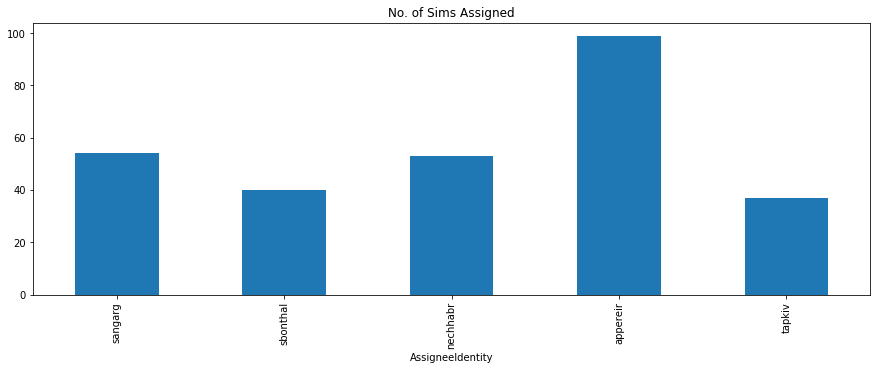

In [48]:
graph=Total_Sim_resolved_till_now.plot(kind='bar',title= 'No. of Sims Assigned',legend= False,figsize=(15,5))

# Automatic Report To Your Outlook

In [49]:
import win32com.client as win32   # importing library

In [51]:
outlook = win32.Dispatch('Outlook.application')

for i,j in Total_Sim_resolved_till_now.itertuples():
    
    if i =='sangarg':
        
        sender  = i 
        message = """
        Hello {0},
        <br>
        <br>
        <p>
        Total {1} sims has been resolved by you till now. Good Job!
        </p>
        <br>
        Thanks & Regards,<br>
        Sandeep | Data Analyst
        """.format(i,j)
    
        email = outlook.createitem(0)
        email.To = '{}@amazon.com'.format(sender)
        email.subject = 'SIM Performance'
        email.HTMLBody = message
        #email.display()
        email.send

True

In [ ]:
# #Snippet to send Email to All

# outlook = win32.Dispatch('Outlook.application')

# for i,j in Total_Sim_resolved_till_now.itertuples():
#     sender  = i 
#     message = """
#     Hello {0},
#     <br>
#     <br>
#     Total {1} sims has been resolved by you till now. Good Job!
#     <br>
#     <br>
#     Thanks & Regards,<br>
#     Sandeep | Data Analyst
#     """.format(i,j)
      
      
#     email = outlook.createitem(0)
#     email.To = '{}@amazon.com'.format(sender)
#     email.subject = 'SIM Performance'
#     email.HTMLBody = message
#     email.display()
# #         email.send


# Data Visualization Using Matplotlib 

In [52]:
B_df= Total_Sim_resolved_till_now
B_df.reset_index(inplace=True)
B_df

,AssigneeIdentity,ShortId
0,sangarg,54
1,sbonthal,40
2,nechhabr,53
3,appereir,99
4,tapkiv,37


<Figure size 792x360 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 1.0, 'No. of Sims Resolved')

Text(0.5, 0, 'Analyst Login')

Text(0, 0.5, 'No. of Sims')

Text(sangarg, 54, '54')

Text(sbonthal, 40, '40')

Text(nechhabr, 53, '53')

Text(appereir, 99, '99')

Text(tapkiv, 37, '37')

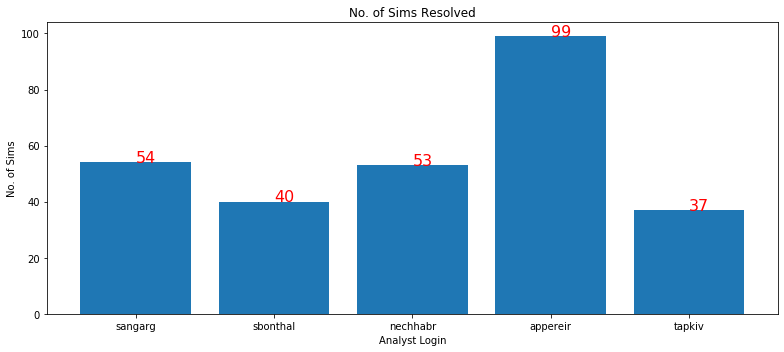

In [54]:
plt.figure(figsize = (11,5))
plt.bar(x= B_df['AssigneeIdentity'],height=B_df['ShortId'])
plt.title('No. of Sims Resolved')
plt.xlabel('Analyst Login')
plt.ylabel('No. of Sims')
plt.tight_layout()
for i,j in Total_Sim_resolved_till_now.values:
    plt.annotate(j,(i,j),color='red',size = 16)

plt.show()

In [ ]:
# To check any particular portion for column/dataframe which has null values

# sim_df.loc[sim_df.Labels.isnull()]